# Comparing the variance on different movies

## Setup

In [1]:
from amftrack.util.sys import data_path
from amftrack.util.plot import extract_kymograth, variance_over_time_on_segment
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image

from skimage.measure import profile_line
%matplotlib notebook

/home/ipausers/kahane/Wks/AMFtrack/amftrack/transfer/functions/transfer.py:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


### Defining the region

In [2]:
image_path = os.path.join(data_path, "width2/variation_analysis/20220324_Plate907_054/Img/Basler_acA4112-30um__40044625__20220324_131604024_0001.tiff")

In [3]:
im = image.imread(image_path)
print(im.shape)

(3000, 4096)


In [4]:
x1, y1 = 2200, 1650
x2, y2 = 2200, 2300

In [5]:
np.linalg.norm(np.array([x1, y1]) - np.array([x2, y2]))

650.0

<IPython.core.display.Javascript object>


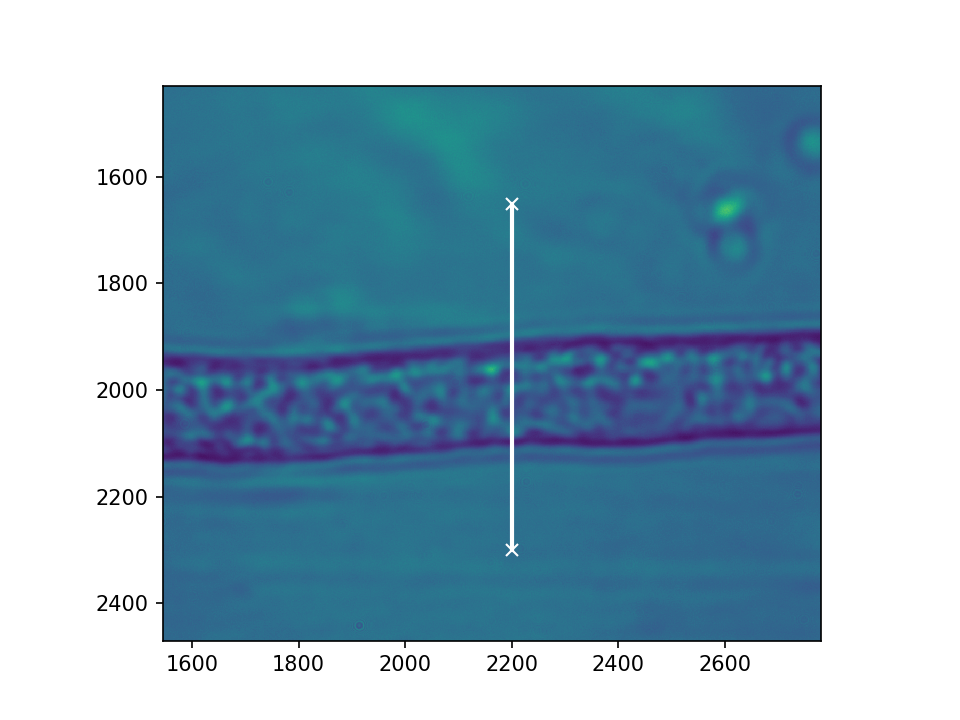

In [6]:
plt.imshow(im)
plt.plot(x1, y1, marker="x", color = 'white')
plt.plot(x2, y2, marker="x", color = 'white')
plt.plot([x1, x2], [y1, y2], color="white", linewidth=2)

### Extract profile

In [7]:
profile = profile_line(im, src = [y1, x1], dst = [y2, x2], linewidth = 1) # careful with (y, x) and not (x, y)
plt.plot(list(range(len(profile))), profile)

In [33]:
profile.shape

(651,)

## Debug

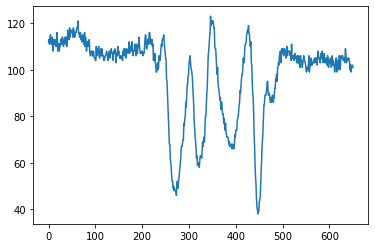

In [34]:
plt.plot(list(range(len(profile))), profile)
plt.show()

## Extraction from different movies

In [35]:
movies = ['movie_054_0', 'movie_054_1', 'movie_054_2', '20220324_Plate907_054/Img']
movie_path = [os.path.join(os.path.join(data_path, "width2/variation_analysis/"), movies[i]) for i in range(len(movies))]

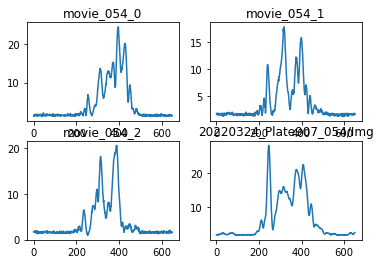

In [36]:
for i, path in enumerate(movie_path):
    variance_on_segment = variance_over_time_on_segment(path, x1, y1, x2, y2)
    plt.subplot(2,2,i+1)
    plt.plot(variance_on_segment)
    plt.title(movies[i])

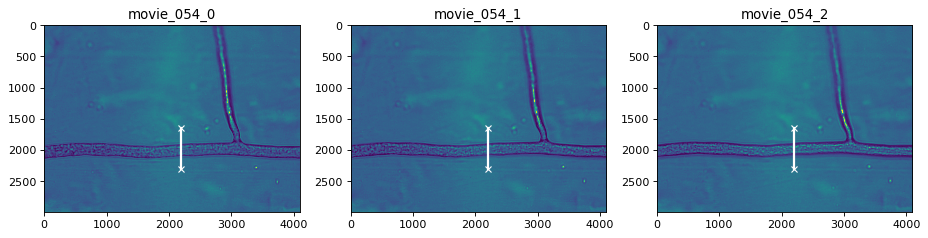

In [37]:
from matplotlib.pyplot import figure
figure(figsize=(14, 8), dpi=80)

for i in range(len(movie_path)-1):
    plt.subplot(1,3,i+1)
    image_path = os.path.join(movie_path[i], os.listdir(movie_path[i])[0])
    im = image.imread(image_path)
    plt.imshow(im)
    plt.imshow(im)
    plt.plot(x1, y1, marker="x", color = 'white')
    plt.plot(x2, y2, marker="x", color = 'white')
    plt.plot([x1, x2], [y1, y2], color="white", linewidth=2)
    plt.title(movies[i])

In [38]:
movies = ['movie_055_0', 'movie_055_1', 'movie_055_2', '20220324_Plate907_055/Img']
movie_path = [os.path.join(os.path.join(data_path, "width2/variation_analysis/"), movies[i]) for i in range(len(movies))]

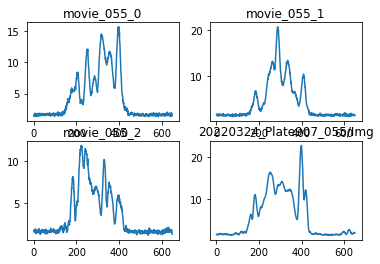

In [39]:
for i, path in enumerate(movie_path):
    variance_on_segment = variance_over_time_on_segment(path, x1, y1, x2, y2)
    plt.subplot(2,2,i+1)
    plt.plot(variance_on_segment)
    plt.title(movies[i])

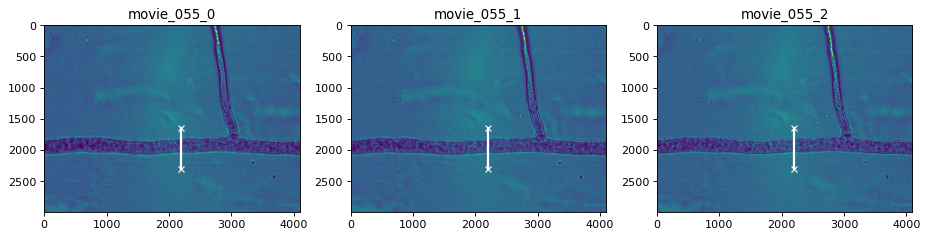

In [40]:
from matplotlib.pyplot import figure
figure(figsize=(14, 8), dpi=80)

for i in range(len(movie_path)-1):
    plt.subplot(1,3,i+1)
    image_path = os.path.join(movie_path[i], os.listdir(movie_path[i])[0])
    im = image.imread(image_path)
    plt.imshow(im)
    plt.imshow(im)
    plt.plot(x1, y1, marker="x", color = 'white')
    plt.plot(x2, y2, marker="x", color = 'white')
    plt.plot([x1, x2], [y1, y2], color="white", linewidth=2)
    plt.title(movies[i])